# 𝔸𝕀 𝕚𝕞𝕒𝕘𝕖 𝕒𝕟𝕒𝕝𝕪𝕤𝕚𝕤 𝕗𝕠𝕣 𝕘𝕖𝕠𝕤𝕔𝕚𝕖𝕟𝕔𝕖 𝕚𝕟 𝟚𝟘𝟚𝟝

Let's test how multi-modal LLMs do on geoscience images in 2025!

See last year's models in [`Geoscience_testing_2025.ipynb`](./Geoscience_testing_2025.ipynb)

Along with the local file `convo.py`, and Jupyter of course, you need a few other libraries to run this notebook:

- `python-dotenv`
- `openai`
- `pillow`
- `numpy`
- `matplotlib`

## Test the endpoints

In [5]:
from convo import Convo

In [1]:
Convo.notebook = False
providers = ['qwen', 'anthropic', 'openai', 'mistral', 'gemini']
models = ['qwen-plus', 'claude-sonnet-4-5-20250929', 'gpt-5-mini', 'mistral-medium-latest', 'gemini-2.5-flash']
for provider, model in zip(providers, models):
    Convo.provider = provider
    Convo.model = model
    c = Convo()
    print(f"{provider}/{model} ", end='')
    print(c.ask('Repeat exactly: ✅ System check', image_uri='file://1x1#FFFFFF.png'))

qwen/qwen-plus ✅ System check
anthropic/claude-sonnet-4-5-20250929 ✅ System check
openai/gpt-5-mini ✅ System check
mistral/mistral-medium-latest ✅ System check
gemini/gemini-2.5-flash ✅ System check


---
# Asking questions about images

There are several kinds of questions we might like to ask:

- Recover text or numbers from the image, eg to read a document or sign in an image
- Texture and object recognition
- Segmentation, eg for analysis of proportional area
- Measurements from the image, eg of objects or the space between them
- ❗ Descriptions of the content, eg to help make sense of a document or prepare a searchable index
- ❗ Questions about the content, eg to learn something about the image that might not be in a description
- ❗ Questions about what the content implies about the past, eg because the image can be interpreted by someone with insight
- ❗ Questions about what the content implies about the future, eg because of cause and effect
- ...and so on

All of these tasks are quite hard, but those with ❗ were extremely hard to do before multi-modal generative AI models came along. 


# Map and cross-section

[The image](https://www.usgs.gov/media/images/typical-geologic-map) is from the USGS and is public domain.

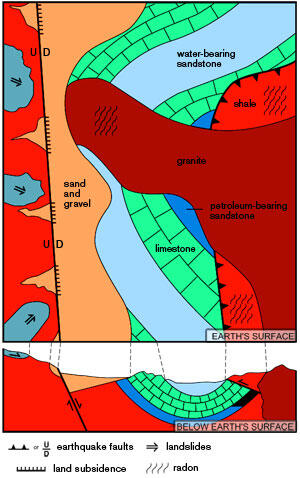

In [6]:
from IPython.display import Image, Markdown

image_url = "./USGS_palladium_sollerfig1.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 427.8933333333333px;">
                  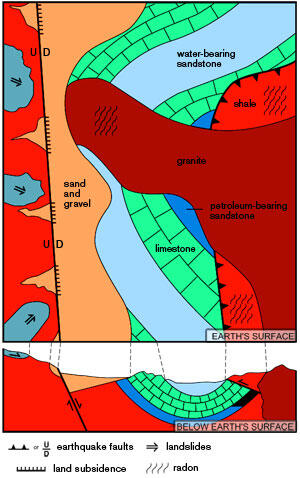
                  <h4>Which is younger, the limestone or the shale? Give your reason but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">gemini/gemini-3-pro-preview</h4>
                  
Based on the geological map and cross-section provided, the **limestone** is younger.

**Reason:**
The cross-section shows the rock layers folded into a **syncline** (a U-shaped fold). In a syncline, the **youngest rocks are found in the center**, and the rocks get progressively older as you move outward. The limestone layer is located near the center of the fold, whereas the shale is located on the outer periphery (and is separated by a thrust fault that pushes older rocks over younger ones), indicating the shale is older.
</div>

In [7]:
Convo.notebook = True
Convo.provider = 'gemini'
Convo.model = 'gemini-3-pro-preview'

q = ("Which is younger, the limestone or the shale? "
     "Give your reason but be brief.")
     # The limestone is younger.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Seismic section

The image is from the [Sub-Surf Rocks blog](http://sub-surfrocks.co.uk/?page_id=197) at the University of Derby, who have licensed it from the UK Onshore Geophysical Library. The license terms are not clear, but [the UKOGL](https://ukogl.org.uk/) calls the image 'free'.

This is the Weald Anticline, a reactivated rift.

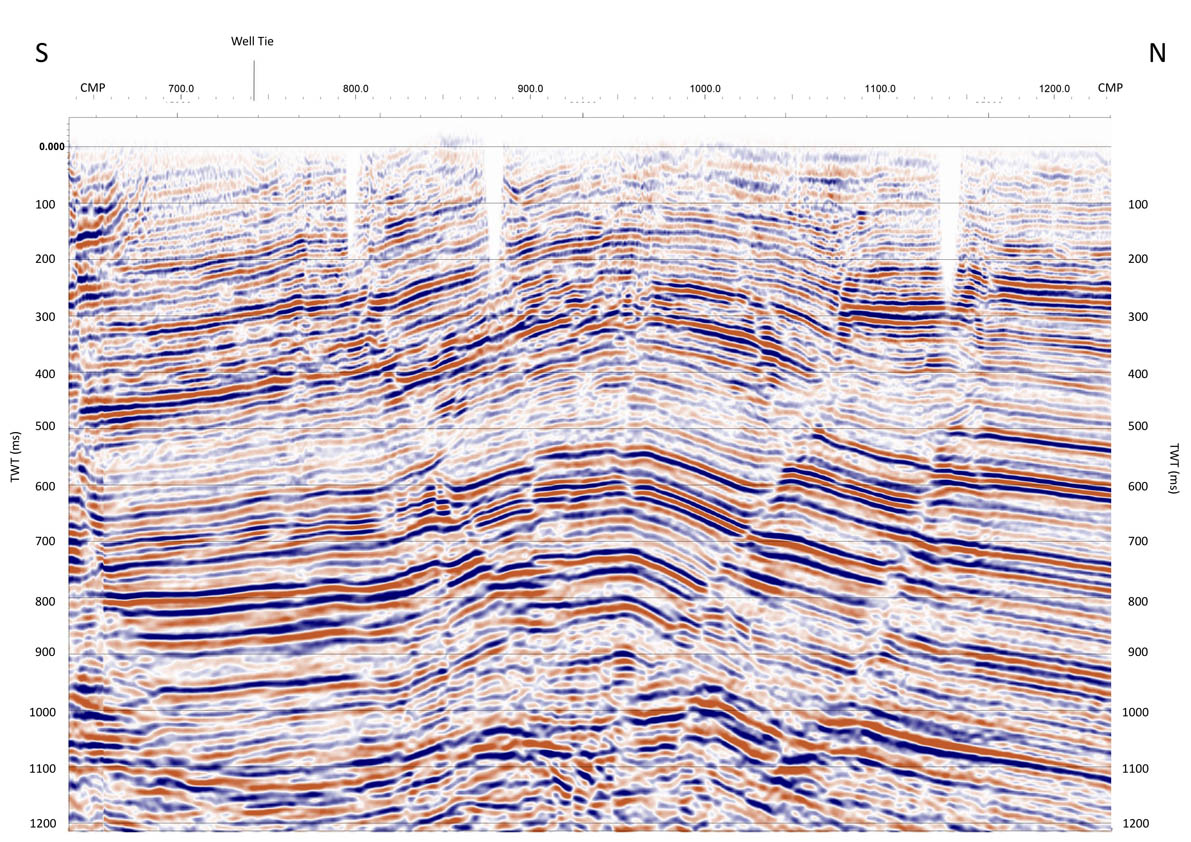

In [32]:
image_url = "subsurfrocks__seismic_a3_colour.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 200.9840470193115px;">
                  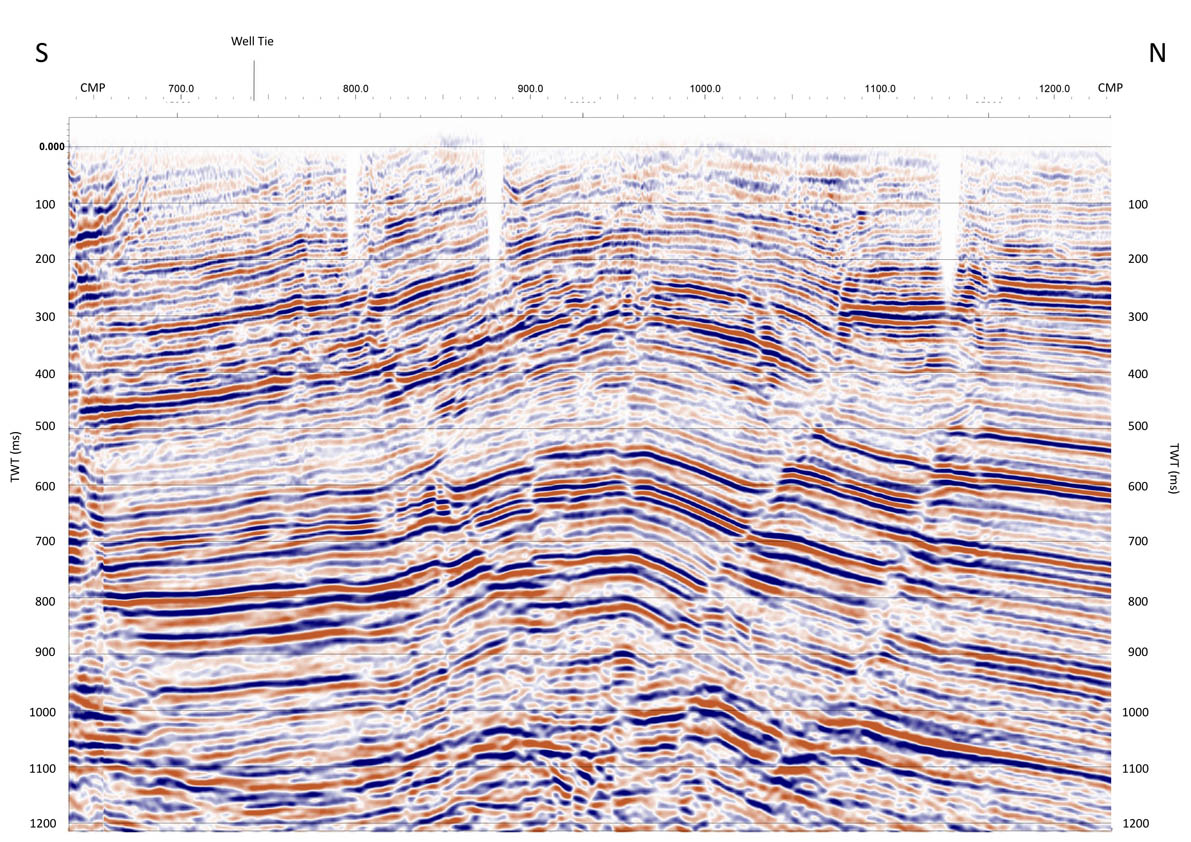
                  <h4>Describe the structural geology. Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">openai/gpt-5</h4>
                  - Setting: Extensional. The line cuts a north‑dipping listric normal fault system forming a half‑graben to the north (right).
- Evidence:
  - Systematic normal offsets stepping down to the north; fault planes flatten with depth (listric).
  - A broad hanging‑wall rollover anticline in the central-right part; small antithetic faults produce a crestal graben.
  - Growth strata: reflections thicken and diverge toward the main fault on the right; onlap/downlap onto the rollover flank, indicating syn‑depositional fault motion.
  - Deeper section is more continuous and gently tilted, with little shortening and no reverse faulting.
- Extras: shallow chaotic energy likely near‑surface noise; vertical white stripes are acquisition/processing artifacts, not geology.
                </div>

In [33]:
Convo.provider = 'anthropic'
Convo.model = 'claude-sonnet-4-5-20250929'

q = ("Describe the structural geology. "
     "Explain your reasoning but be brief.")
     # Rift reactivation.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Core photo

The image is from [REP Austria's website](https://www.rep-austria.at/en/services-expertise/geologie/reservoir-characterisation-formation-evaluation.html) and is used here under the fair use doctrine.

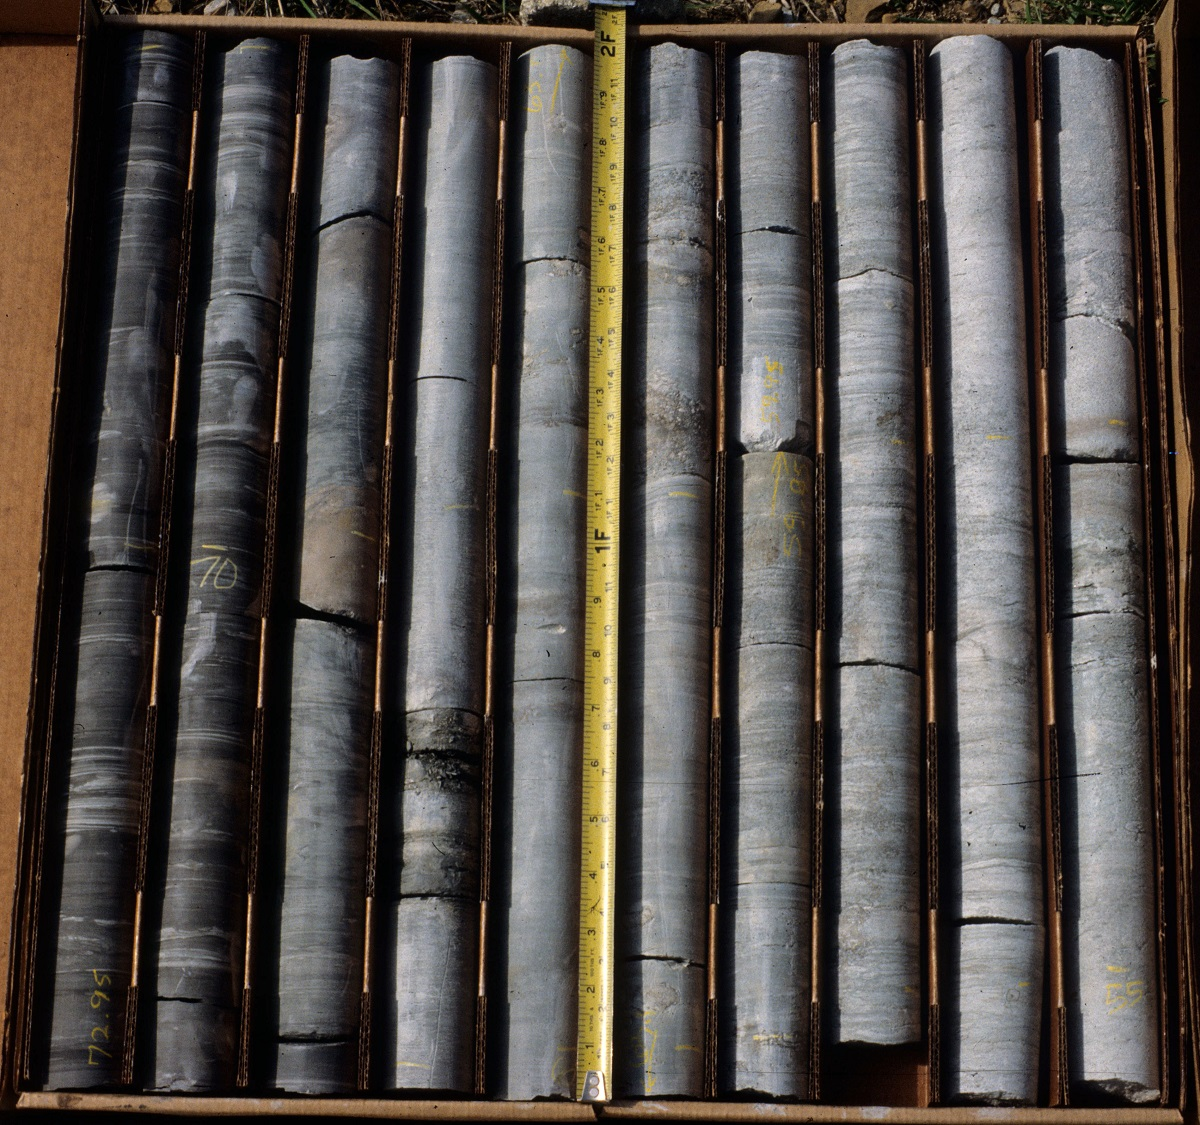

In [35]:
image_url = "./Fig_0C5_core with depths written on it WKUG1_53-72.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 260.0px;">
                  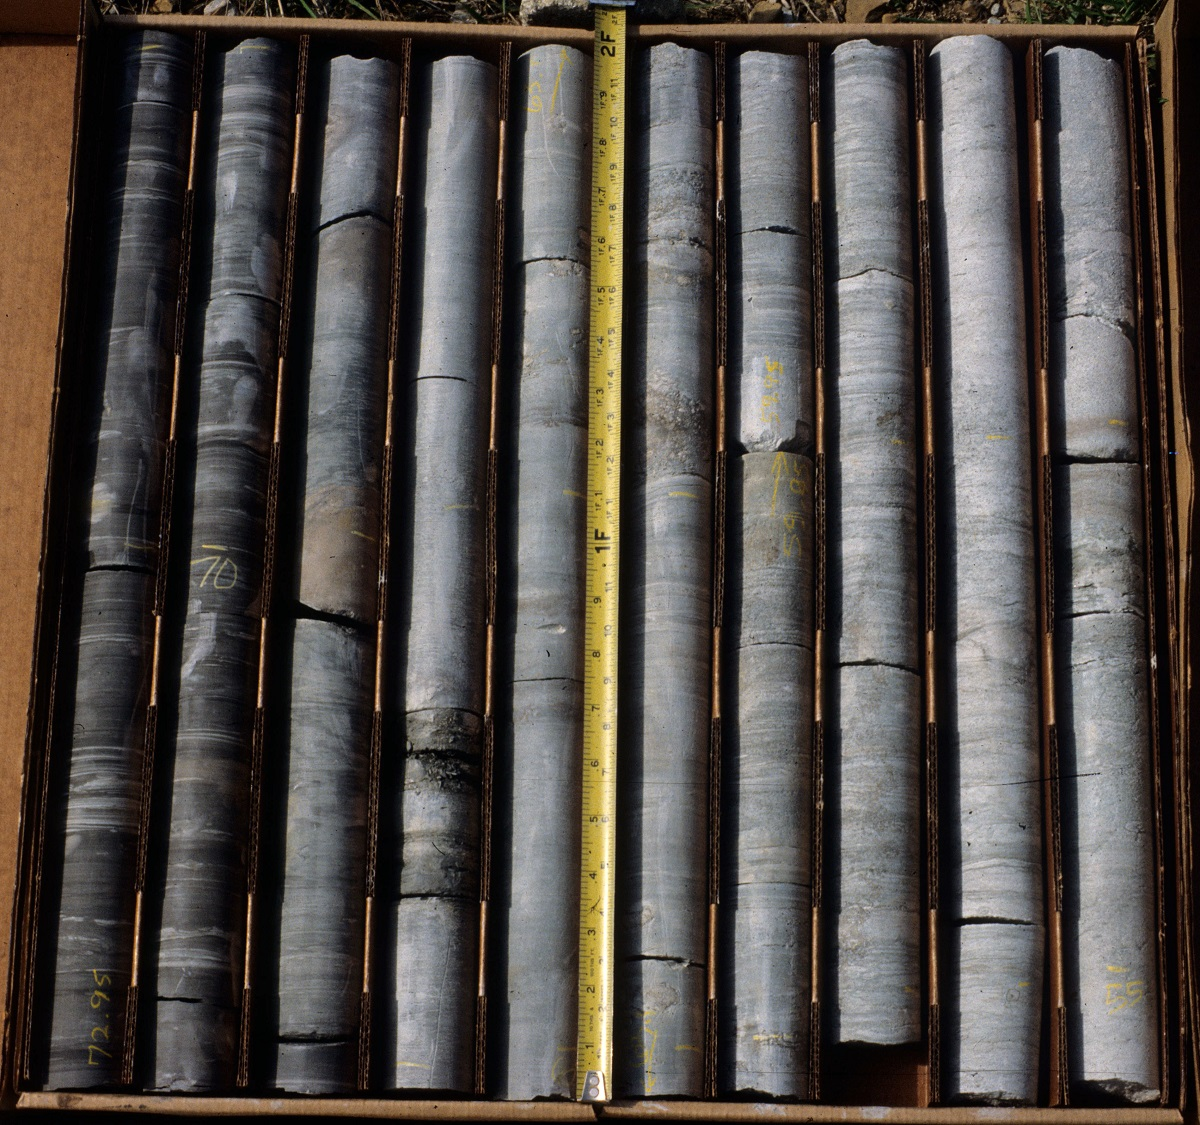
                  <h4>How much core is there here?Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">anthropic/claude-sonnet-4-5-20250929</h4>
                  Looking at this core box, I can estimate the total core length by counting the columns and measuring against the tape measure visible in the image.

**Reasoning:**
- There are **10 columns** of core samples
- The tape measure shows the cores are approximately **3 feet (36 inches)** long
- Total core = 10 columns × 3 feet = **approximately 30 feet**

**Answer: ~30 feet (9 meters) of core**
                </div>

In [17]:
Convo.provider = 'anthropic'
Convo.model = 'claude-sonnet-4-5-20250929'

q = ("How much core is there here? "
     "Explain your reasoning but be brief.")
     # 20 ft or about 6 m

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Block diagram: spatio-temporal reasoning

This image is from [Robert S Leighty's Geology 101 course](https://physci.mesacc.edu/Geology/Leighty/GLG101IN/GLG101IN_Lab03_GeologicMaps/GLG101IN_Lab03_GeologicMaps5.html) at Mesa Community College.

It used to be available online but now it's behind a bot-wall.

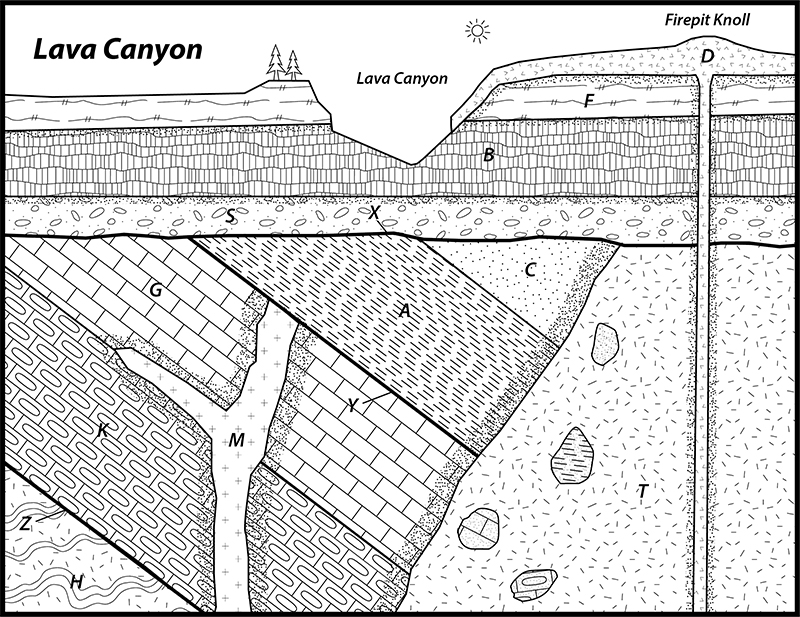

In [37]:
image_url = "./Leighty_MesaCC_GLG101IN_Lab03_Fig23_LavaCanyonSequenceDiagram_800x617.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 217.44px;">
                  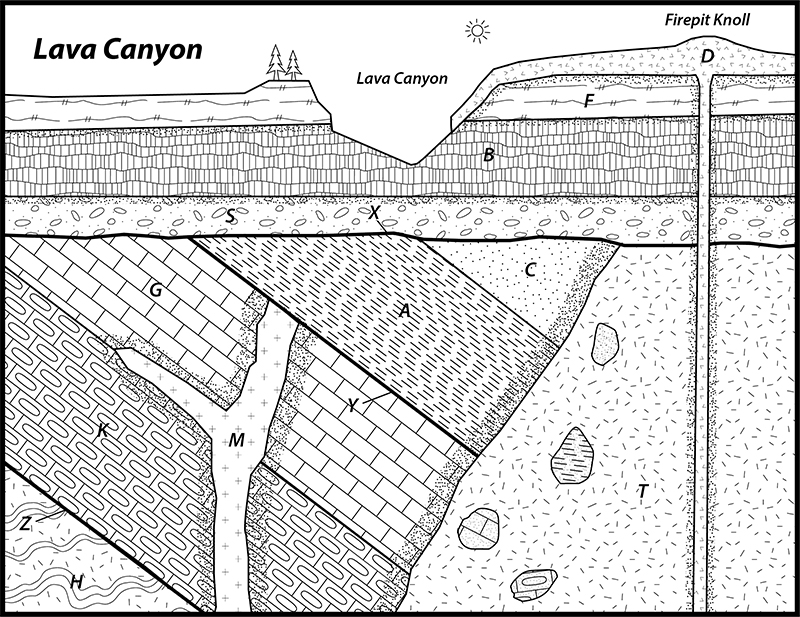
                  <h4>Which is older: T, A, M or X? Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">anthropic/claude-sonnet-4-5-20250929</h4>
                  **M is the oldest.**

**Reasoning:** Following the principle of superposition (older rocks are on the bottom), the relative ages from oldest to youngest are:
- M (bottom basement rock)
- X (tilted sedimentary layer above M)
- A (horizontal sedimentary layer above X, showing the area was eroded flat and new deposition occurred)
- T (intrusion that cuts through multiple layers, making it younger than what it intrudes)

M is at the deepest level and is overlain by all the others.
                </div>

In [40]:
Convo.provider = 'anthropic'
Convo.model = 'claude-sonnet-4-5-20250929'

q = ("Which is older: T, A, M or X? "
     "Explain your reasoning but be brief.")
     # M.

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Photomicrograph: image analysis

The image of a Wolfville Formation (Jurassic) sandstone from Nova Scotia is licensed CC BY-SA by Michael C Rygel, and taken from the Wikipedia page on [lithic sandstone](https://en.wikipedia.org/wiki/Lithic_sandstone).

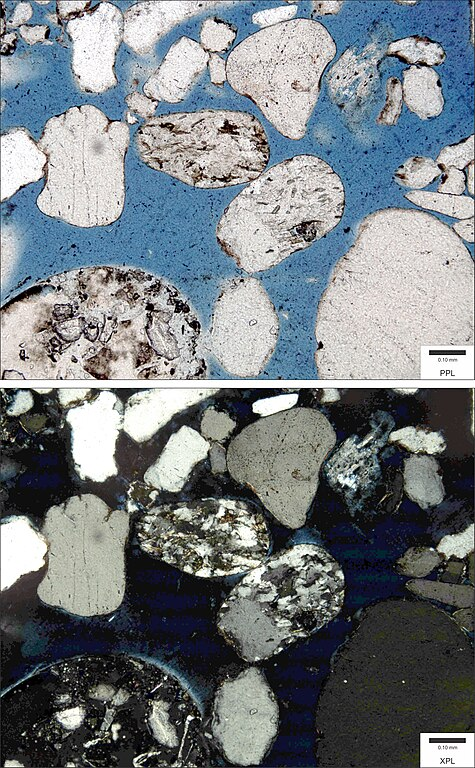

In [24]:
image_url = "NS_sandstone__CC_BY-SA__Michael_C_Rygel__Lithic-arenite.jpg"
Image(image_url)

<div style="border: 3px solid #aaaaee; border-radius: 5px; background-color: #eeeeff; padding: 5px 10px 5px 10px; min-height: 433.9115789473684px;">
                  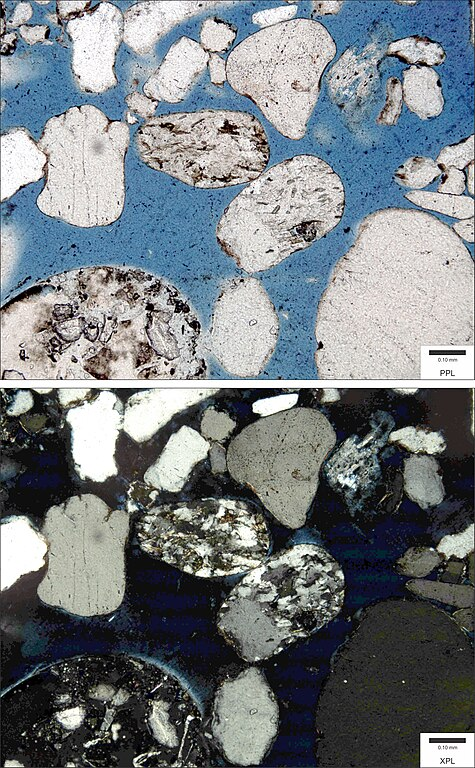
                  <h4>What is the volume fraction of porosity? Explain your reasoning but be brief.</h4>
                  <hr height="10px" color="#aaaaee" />
                  <h4 style="color: #aaaaee;">openai/gpt-5</h4>
                  About 30% (roughly 30±5%).

Reason: The blue-dyed epoxy marks pores. By the Delesse principle, the volume fraction of a phase equals its area fraction in a representative thin section. Visually, about one‑third of the field is blue, giving ≈30% porosity.
                </div>

In [27]:
Convo.provider = 'openai'
Convo.model = 'gpt-5'

q = ("What is the volume fraction of porosity? "
     "Explain your reasoning but be brief.")
     # About 33%

c = Convo()
a = c.ask(q, image_url)

Markdown(a)

# Summary

## 2024


| Image           | Question                       | GPT-4o         | Claude 3.5 Haiku | Gemini 2 Flash |
|:----------------|:-------------------------------|:--------------:|:----------------:|:--------------:|
| Map             | Shale or limestone younger?    | 🔴             | 🔴                | 🔴             |
| Seismic         | Structural style?              | 🔴             | 🔴                | 🔴             |
| Core            | How much core?                 | 🔴             | 🔴                | 🔴             |
| Cross-section   | Which is the oldest?           | 🔴             | 🔴                | 🟠             |
| Thin section    | What is the porosity?          | 🔴             | 🔴                | 🟠             |

## 2025

| Image           | Question                       | GPT-5          | Claude 4.5 Sonnet | Gemini 3 Pro  |
|:----------------|:-------------------------------|:--------------:|:-----------------:|:-------------:|
| Map             | Shale or limestone younger?    | 🔴             | 🔴                 | 🟢            |
| Seismic         | Structural style?              | 🔴             | 🟠                 | 🔴            |
| Core            | How much core?                 | 🔴             | 🔴                 | 🔴            |
| Cross-section   | Which is the oldest?           | 🔴             | 🟠                 | 🔴            |
| Thin section    | What is the porosity?          | 🟢             | 🟢                 | 🟠            |

##### ---
&copy; 2025 Matt Hall &mdash; licensed CC BY